<a href="https://colab.research.google.com/github/mohcenaouadj/House-Pricing-Prediction-Case-Ames/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
! mkdir ~/.kaggle

In [8]:
! cp kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle competitions download House-Prices-Advanced-Regression-Techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 55.5MB/s]


In [13]:
! unzip House-Prices-Advanced-Regression-Techniques.zip

Archive:  House-Prices-Advanced-Regression-Techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_description.txt    
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Data Exploratory

In [14]:
train = pd.read_csv('/content/train.csv', index_col = 0)
test = pd.read_csv('/content/test.csv', index_col = 0)

In [17]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [19]:
print(f' Train set is : {train.shape}')
print(f' Test set is : {test.shape}')

 Train set is : (1460, 80)
 Test set is : (1459, 79)


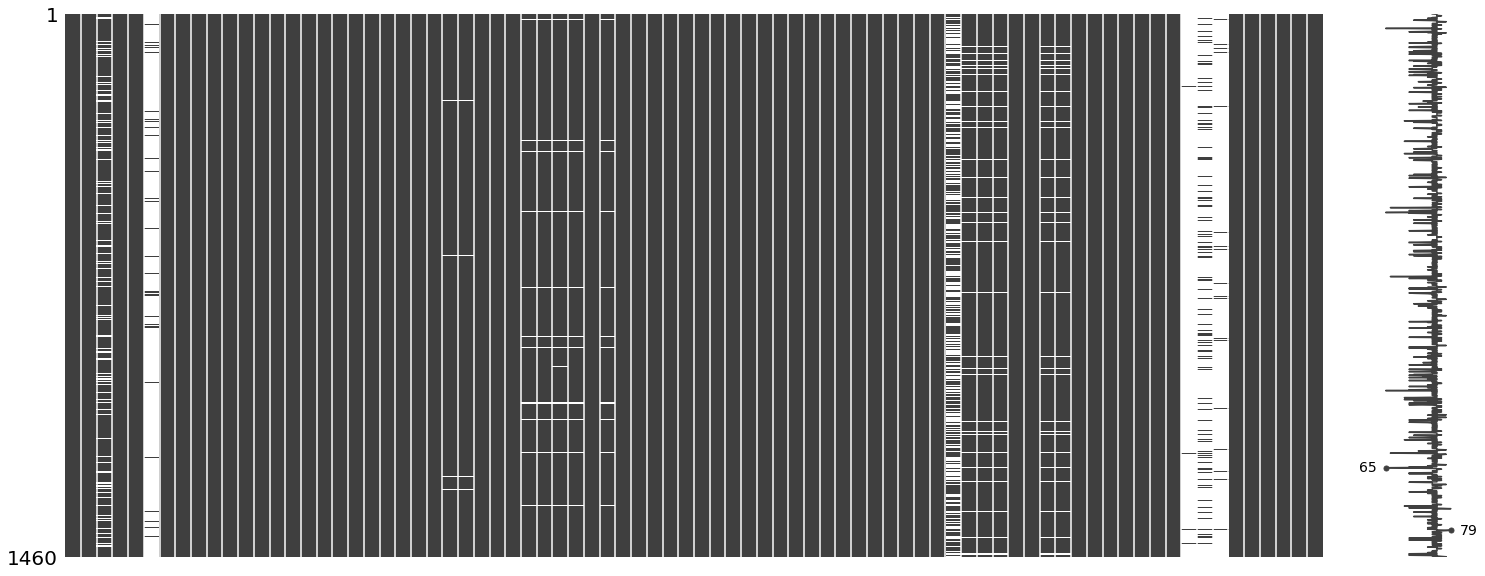

In [20]:
# Missing Values 

msno.matrix(train)

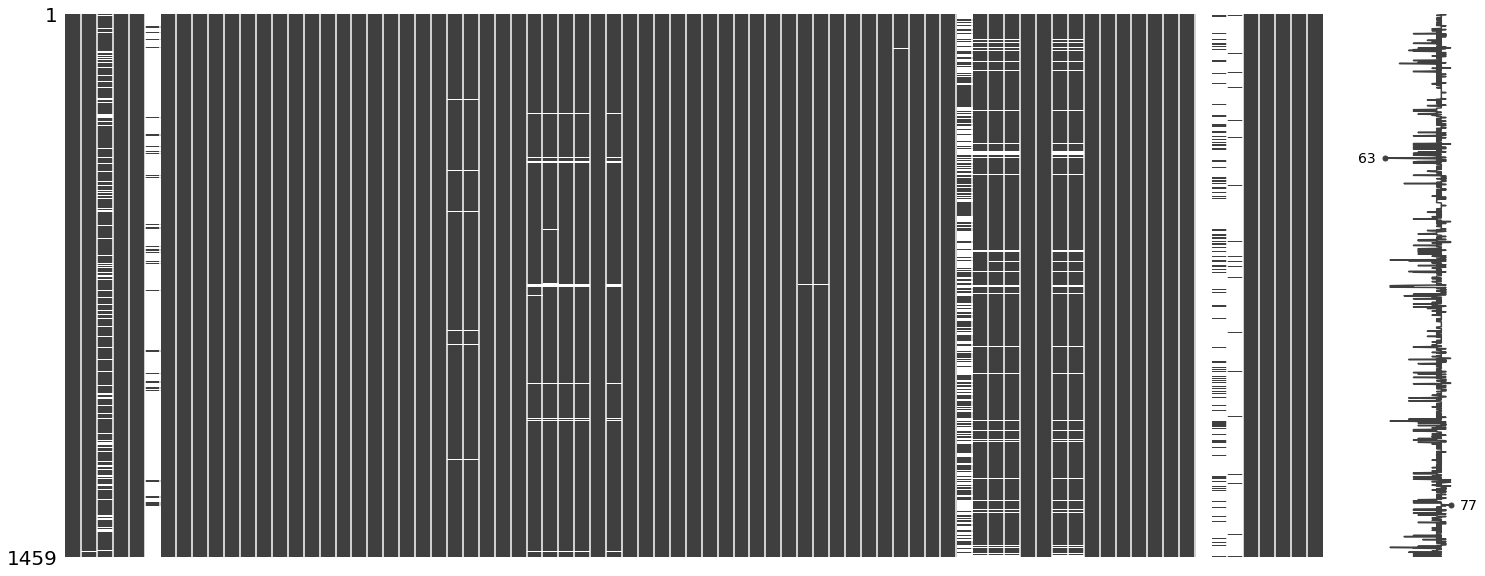

In [21]:
msno.matrix(test)

Both data sets has similarity in missing values possitions, so cleaning them can be easier if we just concatenate them.

Before we start the cleaning we can explore the data values in each column 

## Data Cleaning

In [22]:
data = pd.concat([train, test])
data = data.drop(columns = ['SalePrice'])

### Object type variables 

In [23]:
objectsCol = data.loc[:, data.dtypes == 'object'].columns
intCol = data.loc[:, data.dtypes == 'int64'].columns
floatCol = data.loc[:, data.dtypes == 'float64'].columns

In [24]:
data['Functional'] = data['Functional'].fillna('Typ') 
data['Utilities'] = data['Utilities'].fillna('AllPub') 
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0]) 
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna("TA") 
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['Electrical'] = data['Electrical'].fillna("SBrkr") 

Basement and garage has each 4 columns, we can try to find a way in order to consolidating them into just 2 columns, basement and garage 


Text(0.5, 1.0, 'Garage quality histogram')

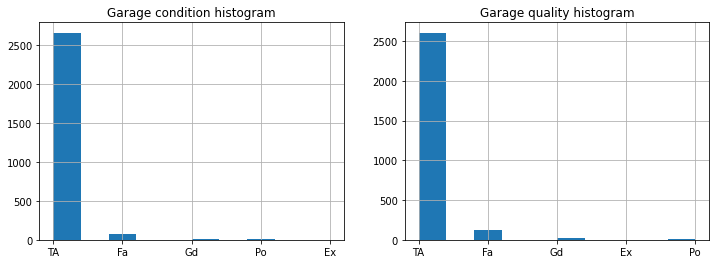

In [25]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
data['GarageCond'].hist()
plt.title('Garage condition histogram')
plt.subplot(1,2,2)
data['GarageQual'].hist()
plt.title('Garage quality histogram')

From both histograms we can be clear that the data is almost considered duplicated and for that we can just drop one of these columns

In [26]:
data = data.drop(columns = ['GarageCond'])

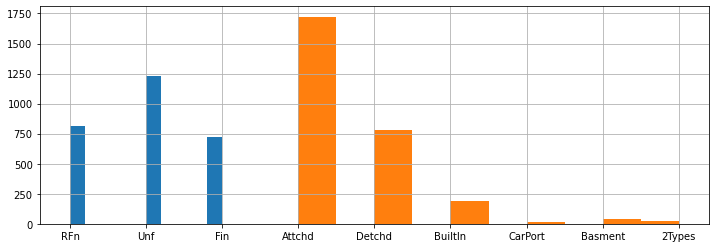

In [27]:
plt.figure(figsize=(12,4))
data['GarageFinish'].hist()
data['GarageType'].hist()

RFn : Roughly Finished  
Unf : Unfinished  
Fin : Finished  
Attchd : Attached garage  
Detchd : Dettached garage

In [28]:
searchfor = 'Fin', 'RFn'
data['HasFinishedGarage'] = np.where(data['GarageFinish'].str.contains('|'.join(searchfor)), 1, 0)
data['DetachedGarage'] = np.where(data['GarageType'].str.contains('Detchd'), 'Detchd', 'othr')

In [29]:
data = data.drop(columns = ['GarageFinish', 'GarageType'])

In this step we basically cleaned our data by just got rude of unneeded data, 'Fin' and 'RFn' are considered finished and for that the new column will have only 2 values, finished : 1 and unfinished : 0. Also I messed up with the garage type, we each have dettached garage or other types, that's it.

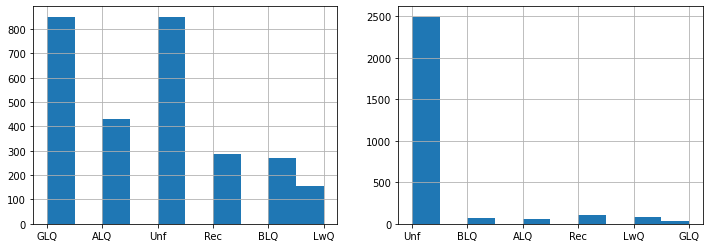

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
data['BsmtFinType1'].hist()
plt.subplot(1,2,2)
data['BsmtFinType2'].hist()

In [31]:
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(value = 'NA')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(value = 'NA')

In the description file, the basements varie from good living to unfinished, and the last value 'NA' is for 'no basement', so it's better to fill the nan values with 'NA' as 'No basement'.

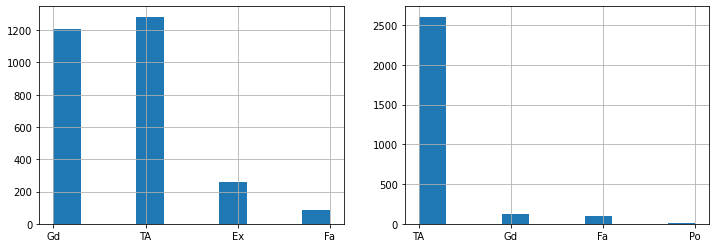

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
data['BsmtQual'].hist()
plt.subplot(1,2,2)
data['BsmtCond'].hist()

In [33]:
cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 
        'FireplaceQu', 'GarageQual', 'PoolQC']

for i in cols :
  print(f'{i} has {data[i].isna().sum()} nan values')

ExterQual has 0 nan values
ExterCond has 0 nan values
BsmtQual has 81 nan values
BsmtCond has 82 nan values
HeatingQC has 0 nan values
KitchenQual has 0 nan values
FireplaceQu has 1420 nan values
GarageQual has 159 nan values
PoolQC has 2909 nan values


In [34]:
data['BsmtQual'] = data['BsmtQual'].fillna(value = 'NA')
data['BsmtCond'] = data['BsmtCond'].fillna(value = 'NA')
data['GarageQual'] = data['GarageQual'].fillna(value = 'NA')
data['PoolQC'] = data['PoolQC'].fillna(value = 'NA')
data['FireplaceQu'] = data['FireplaceQu'].fillna(value = 'NA')
data['BsmtExposure'] = data['BsmtExposure'].fillna(value = 'NA')
data['Fence'] = data['Fence'].fillna(value = 'NA')
data['MiscFeature'] = data['MiscFeature'].fillna(value = 'NA')
data['Alley'] = data['Alley'].fillna(value = 'NA')
data['MSZoning'] = data['MSZoning'].fillna(value = 'C (all)')
data['MasVnrType'] = data['MasVnrType'].fillna(value = 'None')
data['MasVnrType'] = data['MasVnrType'].replace(['None'], 'NA')

In [35]:
objects = data.loc[:, data.dtypes == 'object'].isna().sum()
ints = data.loc[:, data.dtypes == 'int64'].isna().sum()
floats = data.loc[:, data.dtypes == 'float64'].isna().sum()

In [36]:
objects

MSZoning          0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       0
Functional        0
FireplaceQu       0
GarageQual        0
PavedDrive        0
PoolQC            0
Fence             0
MiscFeature       0
SaleType          0
SaleCondition     0
DetachedGarage    0
dtype: int64

### Float type variables

In [41]:
f = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
for i in f:
  data[i] = data[i].fillna(value = float(data[i].mean()))

In [42]:
data['GarageCars'] = data['GarageCars'].fillna(value = float(0))
data['GarageArea'] = data['GarageArea'].fillna(value = float(data['GarageArea'].mean()))
data['MasVnrArea'] = data['MasVnrArea'].fillna(value = float(data['MasVnrArea'].mean()))
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(value = float(round(data['GarageYrBlt'].mean())))
data['LotFrontage'] = data['LotFrontage'].fillna(value = float(round(data['LotFrontage'].mean())))

In [44]:
data.loc[:, data.dtypes == 'float64'].isna().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

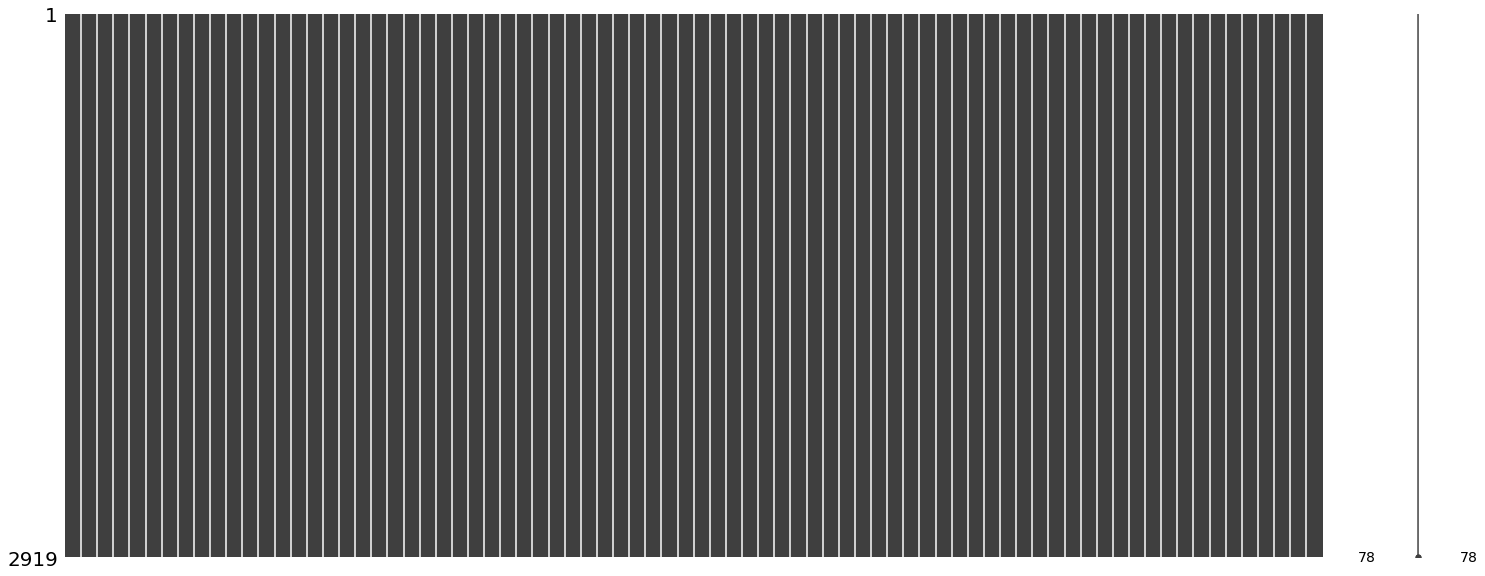

In [45]:
msno.matrix(data)

In [46]:
data.to_csv("/content/sample_data/data_clean.csv")

## Pair-wise Correlations

The purpose of this section is to identify the predictor variables that have strong effect on the target variable, as well as each other in case of multicollinearity.

In [47]:
df_train = data.iloc[0:1460, :]
df_test = data.iloc[1460:,:]

In [48]:
df_train = pd.concat([df_train, train['SalePrice']], axis = 1)

In [49]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasFinishedGarage,DetachedGarage,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,NA,NA,0,2,2008,WD,Normal,1,othr,208500
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,NA,NA,0,5,2007,WD,Normal,1,othr,181500
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,NA,NA,0,9,2008,WD,Normal,1,othr,223500
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,NA,NA,0,2,2006,WD,Abnorml,0,Detchd,140000
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,NA,NA,0,12,2008,WD,Normal,1,othr,250000


In [66]:
c = list(df_train.columns)
"""
CorrVar = df_train[c]
s = CorrVar.corr()['SalePrice'][CorrVar.corr()['SalePrice'] >= .5]
corr_list = [s for s in s.index]
"""

"\nCorrVar = df_train[c]\ns = CorrVar.corr()['SalePrice'][CorrVar.corr()['SalePrice'] >= .5]\ncorr_list = [s for s in s.index]\n"

In [67]:
corr = [np.corrcoef(df_train['SalePrice'], df_train[i])[1,0] for i in c]
correlation = pd.DataFrame(data = corr, index = cols)

TypeError: ignored

Text(0.5, 1.0, 'Correlation Matrix: Ames Housing Data Set Variables ')

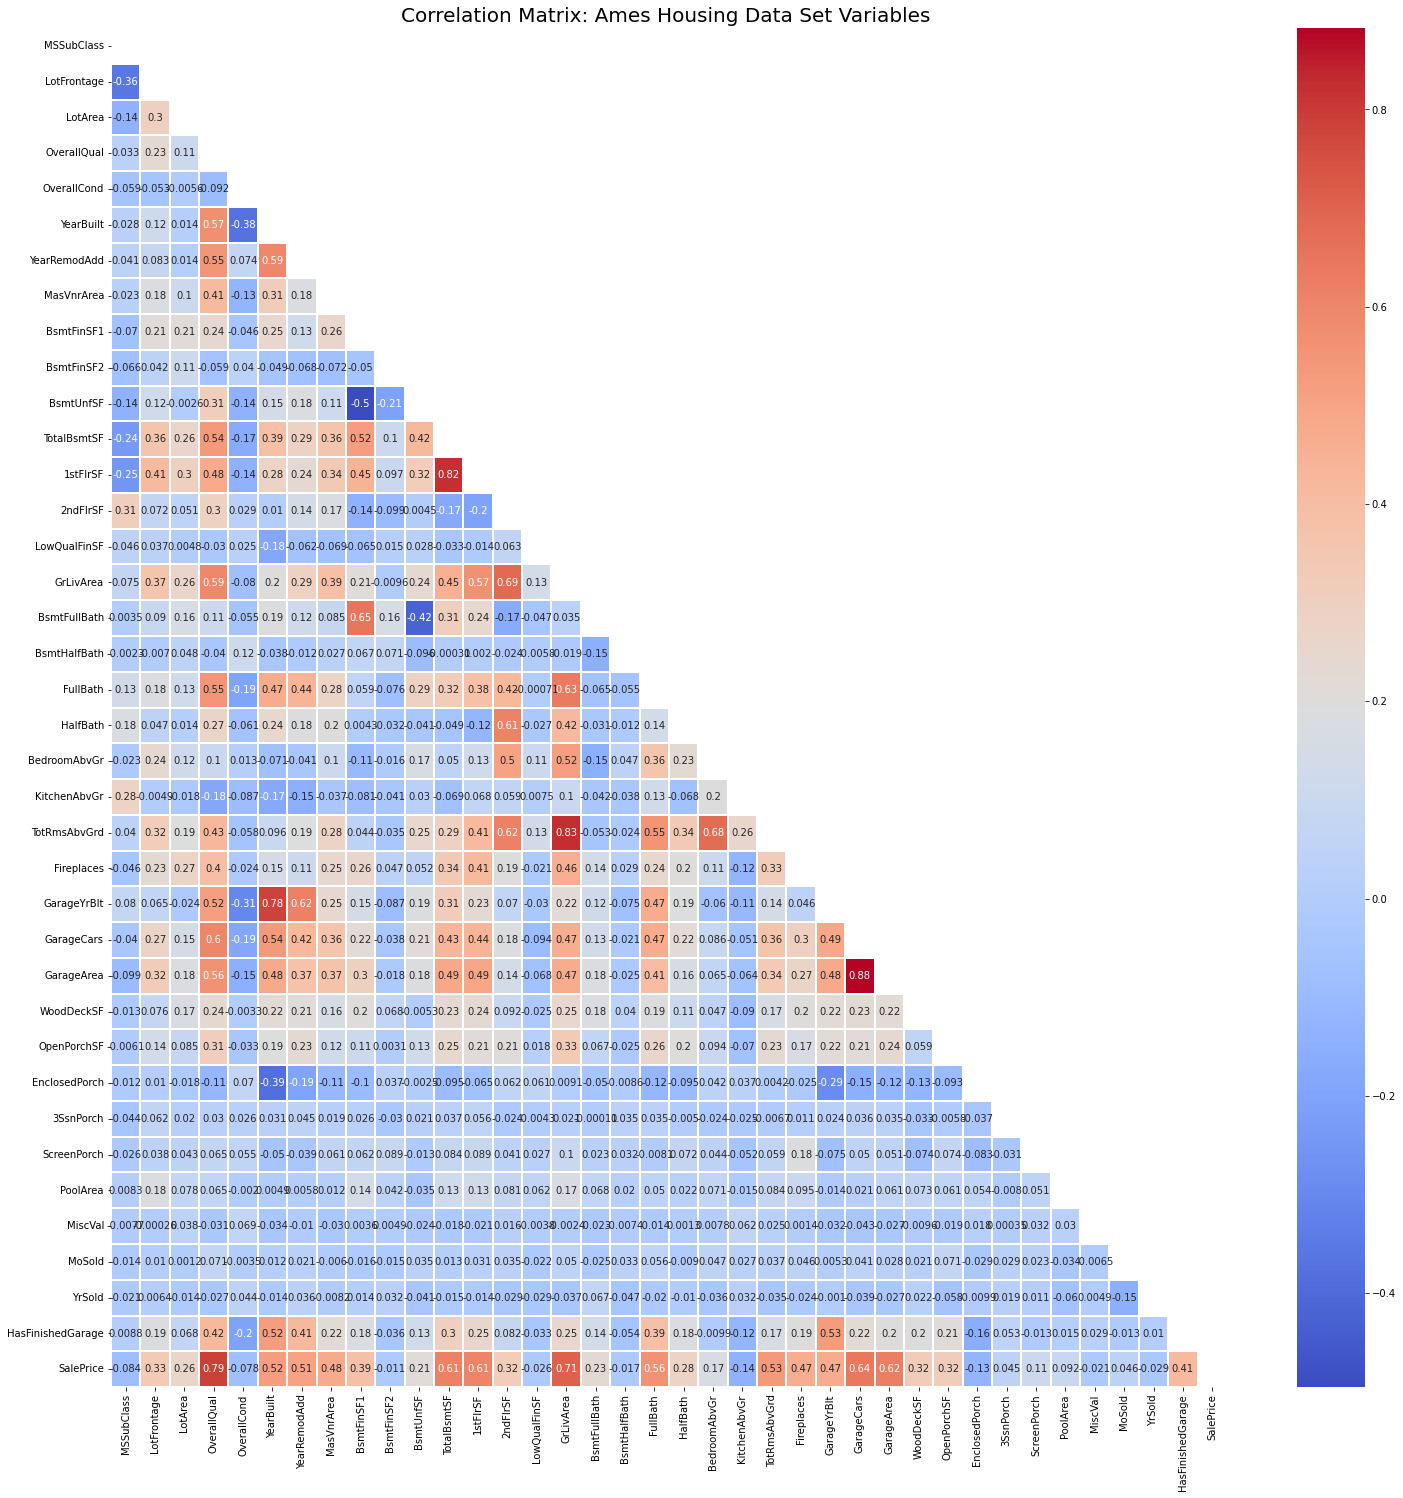

In [68]:
plt.figure(figsize = (25,25))
mask = np.triu(np.ones_like(df_train.corr(), dtype=bool))
sns.heatmap(df_train.corr(), annot = True,linewidths=1,mask = mask, cmap="coolwarm",)
plt.title('Correlation Matrix: Ames Housing Data Set Variables ', fontsize=20)

We can spot some high correlation values betwee : 
- GarageCars & Garage area, which can obvious, more area means more cars to park.
- GrLivArea and TotRmsAbvGrd, more ground area means more rooms.
- SalePrice and OverallQual, the finish of the house as well as the materials used effect the sale price a lot.
- SalePrice and GrLivArea, is a strong predictor as well.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


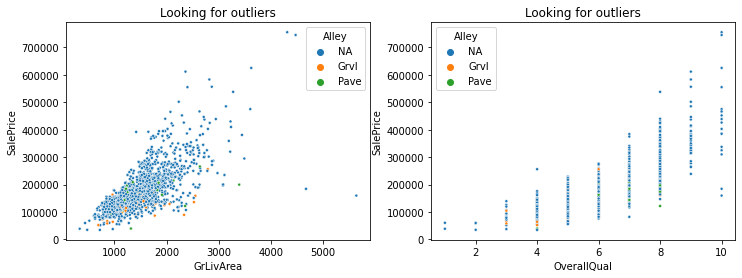

In [60]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.scatterplot('GrLivArea', 'SalePrice',hue="Alley",data = df_train, marker = ".", )
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.subplot(1,2,2)
sns.scatterplot('OverallQual', 'SalePrice',hue="Alley",data = df_train, marker = ".", )
plt.title("Looking for outliers")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()